In [ ]:
%pip install textblob
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:

news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df = pd.read_csv('../data/AAPL_historical_data.csv')

# Convert 'date' column to datetime first, then extract date
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date
stock_df['date'] = pd.to_datetime(stock_df['Date'], errors='coerce').dt.date

In [21]:
from textblob import TextBlob
import pandas as pd

# Ensure 'date' column exists and is in proper datetime format (then convert to just date)
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date

# Drop rows with invalid dates or missing headlines
news_df.dropna(subset=['date', 'headline'], inplace=True)

# Define sentiment analysis function
def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0.0

# Apply sentiment function
news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

# Compute daily average sentiment
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['date', 'avg_sentiment']


In [22]:
stock_df.sort_values('date', inplace=True)
stock_df['daily_return'] = stock_df['Close'].pct_change()

# Drop NaN in returns
stock_df.dropna(subset=['daily_return'], inplace=True)


In [23]:
merged_df = pd.merge(stock_df, daily_sentiment, on='date', how='inner')


In [ ]:
correlation, p_value = pearsonr(merged_df['avg_sentiment'], merged_df['daily_return'])
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation Coefficient: -0.0020
P-value: 0.9236


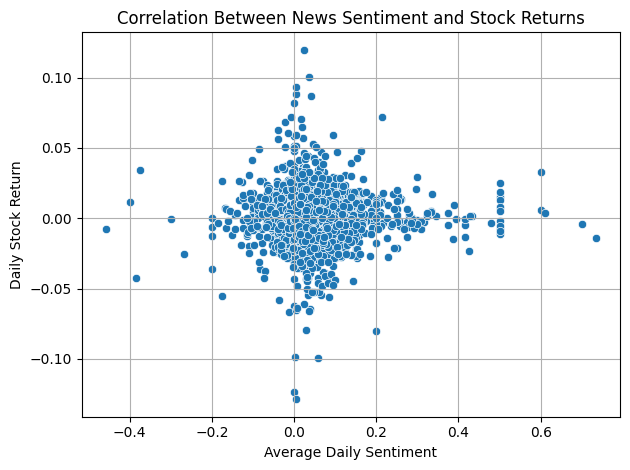

In [ ]:
sns.scatterplot(x='avg_sentiment', y='daily_return', data=merged_df)
plt.title('Correlation Between News Sentiment and Stock Returns')
plt.xlabel('Average Daily Sentiment')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.tight_layout()
plt.show()
